In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

In [2]:
RATIOS = ['L1',
       'L2', 'L3', 'NCL_CF', 'CASH_TA', 'INV_COGS', 'CC_SAL', 'TL_COST',
       'CL_COST', 'SAL_TA', 'EQ_TA', 'EQ_TL', 'CL_CC', 'LTC_NCA', 'TZ',
       'CF_TL', 'CL_TA', 'NCL_TA', 'EBT_REV', 'ROS', 'EAT_REV', 'ROA', 'ROE',
       'CF_TA', 'CF_SAL', 'LABOR_EAT', 'LABOR_REV']

PRIMARY_VALUES = [
    'CA', 'CASH',
       'CL', 'EQ', 'NCL', 'TA', 'TL', 'CC', 'INV', 'CF_NETTO', 'CF_SELFFIN',
       'REV', 'VA', 'OE', 'EAT', 'EBIT', 'SAL', 'COST', 'INT'
]


REDUCED_FEATURE_SET = ['L1', 'L3', 'EQ_TA', 'CL_CC', 'LTC_NCA', 'TZ', 'CF_TL', 'CL_TA', 'ROS', 'ROA', 'ROE']

SKNACE_ONE_HOT = ['sknace_C', 'sknace_F', 'sknace_G', 'sknace_H', 'sknace_M', 'sknace_other']

In [3]:
training_raw = pd.read_csv('../../DATA/FINAL/final/training_sample.csv')
testing_raw = pd.read_csv('../../DATA/FINAL/final/testing_sample.csv')
training_raw.shape, testing_raw.shape

((7188, 108), (1797, 108))

In [4]:
SAL_CLASSES = training_raw['sal_class'].unique()
SKNACE_GROUPS = training_raw['sknace_division_normalized'].unique()

In [5]:
training_filled = training_raw.copy()
testing_filled = testing_raw.copy()

IMBALANCED TESTING - RAW
0.843262001156738
0.3333333333333333
0.007434944237918215
0.014545454545454544
0.5023476091052604
0.5023476091052604


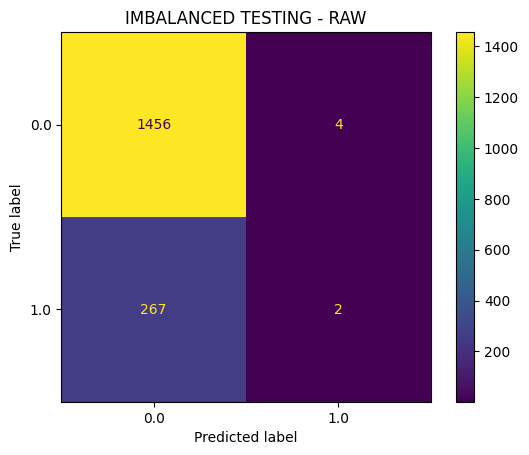

IMBALANCED TESTING - FORCE BALANCE
0.5338345864661654
0.21825813221406087
0.7732342007434945
0.3404255319148936
0.6314801140703774
0.6314801140703774


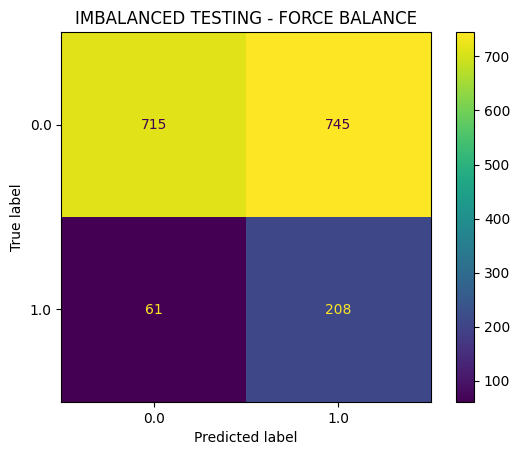

IMBALANCED TESTING - SMOTE+RUS
0.5378831694621168
0.21987315010570824
0.7732342007434945
0.34238683127572017
0.63387737434435
0.63387737434435


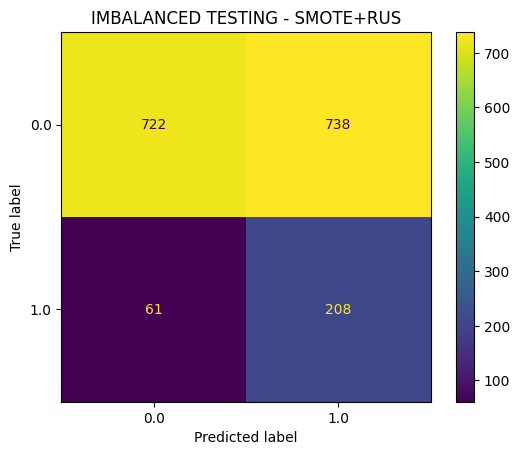

In [8]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


Q = training_filled.query('combined_issue_criteria_3y_off == 1')['entity_id'].nunique()


control_group_ratio = 1.5

training_balanced = (
    pd.concat(
        [
            training_filled.query('combined_issue_criteria_3y_off == 0').sample(int(Q * control_group_ratio)),
            training_filled.query('combined_issue_criteria_3y_off == 1'),
        ], axis = 0
    )
)


Q_test = testing_filled.query('combined_issue_criteria_3y_off == 1')['entity_id'].nunique()


testing_balanced = (
    pd.concat(
        [
            testing_filled.query('combined_issue_criteria_3y_off == 0').sample(int(Q_test * control_group_ratio)),
            testing_filled.query('combined_issue_criteria_3y_off == 1'),
        ], axis = 0
    )
)


X_train_balanced = training_balanced[RATIOS].values
y_train_balanced = training_balanced['combined_issue_criteria_3y_off'].values

X_test_balanced = testing_balanced[RATIOS].values
y_test_balanced = testing_balanced['combined_issue_criteria_3y_off'].values

X_train_imbalanced = training_filled[RATIOS].values
y_train_imbalanced = training_filled['combined_issue_criteria_3y_off'].values

X_test_imbalanced = testing_filled[RATIOS].values
y_test_imbalanced = testing_filled['combined_issue_criteria_3y_off'].values


# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42, )

# X_train_balanced, y_train_balanced = smote.fit_resample(X_train_imbalanced, y_train_imbalanced)
# X_test_balanced, y_test_balanced = smote.fit_resample(X_test_imbalanced, y_test_imbalanced)

